In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn import metrics

In [2]:
import seaborn as sns

In [3]:
p_df=pd.read_csv('parkinsons.data')

In [4]:
p_df.head(20)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0   phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1   phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2   phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3   phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4   phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5   phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6   phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7   phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8   phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9   phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10  phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11  phon_R01_S02_6       91.904       115.871        86.292         0.00540   
12  phon_R01_S04_1      136.926       159.866       131.276         0.00293   
13  phon_R01_S04_2      139.173       179.139        76.556         0.00390   
14  phon_R01_S04_3      152.845       163.305        75.836         0.00294   
15  phon_R01_S04_4      142.167       217.455        83.159         0.00369   
16  phon_R01_S04_5      144.188       349.259        82.764         0.00544   
17  phon_R01_S04_6      168.778       232.181        75.603         0.00718   
18  phon_R01_S05_1      153.046       175.829        68.623         0.00742   
19  phon_R01_S05_2      156.405       189.398       142.822         0.00768   

    MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0            0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1            0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2            0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3            0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4            0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5            0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6            0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7            0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8            0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9            0.00006   0.00268   0.00332     0.00803       0.02838  ...   
10           0.00006   0.00254   0.00330     0.00763       0.02143  ...   
11           0.00006   0.00281   0.00336     0.00844       0.02752  ...   
12           0.00002   0.00118   0.00153     0.00355       0.01259  ...   
13           0.00003   0.00165   0.00208     0.00496       0.01642  ...   
14           0.00002   0.00121   0.00149     0.00364       0.01828  ...   
15           0.00003   0.00157   0.00203     0.00471       0.01503  ...   
16           0.00004   0.00211   0.00292     0.00632       0.02047  ...   
17           0.00004   0.00284   0.00387     0.00853       0.03327  ...   
18           0.00005   0.00364   0.00432     0.01092       0.05517  ...   
19           0.00005   0.00372   0.00399     0.01116       0.03995  ...   

    Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0       0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1       0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2       0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3       0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4       0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5       0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6       0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7       0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8       0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9       0.04324  0.01022  21.862      

In [5]:
p_df.tail(20)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
175  phon_R01_S43_5      115.380       123.109       108.634         0.00332   
176  phon_R01_S43_6      116.388       129.038       108.970         0.00346   
177  phon_R01_S44_1      151.737       190.204       129.859         0.00314   
178  phon_R01_S44_2      148.790       158.359       138.990         0.00309   
179  phon_R01_S44_3      148.143       155.982       135.041         0.00392   
180  phon_R01_S44_4      150.440       163.441       144.736         0.00396   
181  phon_R01_S44_5      148.462       161.078       141.998         0.00397   
182  phon_R01_S44_6      149.818       163.417       144.786         0.00336   
183  phon_R01_S49_1      117.226       123.925       106.656         0.00417   
184  phon_R01_S49_2      116.848       217.552        99.503         0.00531   
185  phon_R01_S49_3      116.286       177.291        96.983         0.00314   
186  phon_R01_S49_4      116.556       592.030        86.228         0.00496   
187  phon_R01_S49_5      116.342       581.289        94.246         0.00267   
188  phon_R01_S49_6      114.563       119.167        86.647         0.00327   
189  phon_R01_S50_1      201.774       262.707        78.228         0.00694   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
175           0.00003   0.00160   0.00199     0.00480       0.01503  ...   
176           0.00003   0.00169   0.00213     0.00507       0.01725  ...   
177           0.00002   0.00135   0.00162     0.00406       0.01469  ...   
178           0.00002   0.00152   0.00186     0.00456       0.01574  ...   
179           0.00003   0.00204   0.00231     0.00612       0.01450  ...   
180           0.00003   0.00206   0.00233     0.00619       0.02551  ...   
181           0.00003   0.00202   0.00235     0.00605       0.01831  ...   
182           0.00002   0.00174   0.00198     0.00521       0.02145  ...   
183           0.00004   0.00186   0.00270     0.00558       0.01909  ...   
184           0.00005   0.00260   0.00346     0.00780       0.01795  ...   
185           0.00003   0.00134   0.00192     0.00403       0.01564  ...   
186           0.00004   0.00254   0.00263     0.00762       0.01660  ...   
187           0.00002   0.00115   0.00148     0.00345       0.01300  ...   
188           0.00003   0.00146   0.00184     0.00439       0.01185  ...   
189           0.00003   0.00412   0.00396     0.01235       0.02574  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
175      0.02436  0.00401  26.005       0  0.405991  0.761255 -5.966779   
176      0.02623  0.00415  26.143       0  0.361232  0.763242 -6.016891   
177      0.02184  0.00570  24.151       1  0.396610  0.745957 -6.486822   
178      0.02518  0.00488  24.412       1  0.402591  0.762508 -6.311987   
179      0.02175  0.00540  23.683       1  0.398499  0.778349 -5.711205   
180      0.03964  0.00611  23.133       1  0.352396  0.759320 -6.261446   
181      0.02849  0.00639  22.866       1  0.408598  0.768845 -5.704053   
182      0.03464  0.00595  23.008       1  0.329577  0.757180 -6.277170   
183      0.02592  0.00955  23.079       0  0.603515  0.669565 

In [6]:
p_df.sample(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
100  phon_R01_S24_4      125.641       141.068       116.346         0.03316   
187  phon_R01_S49_5      116.342       581.289        94.246         0.00267   
27   phon_R01_S06_4      146.845       208.701        81.737         0.00496   
106  phon_R01_S25_4      155.078       163.736       144.148         0.00168   
156  phon_R01_S37_4      122.336       142.369        94.794         0.00727   
134  phon_R01_S33_1      106.516       112.777        93.105         0.00589   
164  phon_R01_S39_6      102.273       142.830        85.902         0.00907   
20   phon_R01_S05_3      153.848       165.738        65.782         0.00840   
166  phon_R01_S42_2      237.323       243.709       229.256         0.00303   
160  phon_R01_S39_2      114.238       124.393        77.022         0.00581   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
100           0.00026   0.02144   0.01522     0.06433       0.09178  ...   
187           0.00002   0.00115   0.00148     0.00345       0.01300  ...   
27            0.00003   0.00250   0.00275     0.00749       0.01919  ...   
106           0.00001   0.00068   0.00092     0.00204       0.01064  ...   
156           0.00006   0.00415   0.00339     0.01246       0.02293  ...   
134           0.00006   0.00291   0.00319     0.00873       0.04932  ...   
164           0.00009   0.00493   0.00461     0.01480       0.02814  ...   
20            0.00005   0.00428   0.00450     0.01285       0.03810  ...   
166           0.00001   0.00173   0.00159     0.00519       0.01242  ...   
160           0.00005   0.00299   0.00316     0.00896       0.04009  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
100      0.16074  0.31482   8.867       1  0.671299  0.656846 -3.700544   
187      0.01892  0.00680  25.023       0  0.528485  0.663884 -6.359018   
27       0.02650  0.01328  25.119       1  0.358773  0.726652 -6.271690   
106      0.01567  0.00233  29.746       1  0.334171  0.677930 -6.981201   
156      0.03615  0.03191  22.953       1  0.611679  0.623731 -5.435100   
134      0.08050  0.03031  17.060       1  0.637814  0.744064 -5.301321   
164      0.04736  0.03882  18.447       1  0.671378  0.674562 -2.929379   
20       0.05000  0.03871  17.536       1  0.660125  0.704087 -4.095442   
166      0.02089  0.00533  24.679       0  0.384868  0.626710 -7.018057   
160      0.04736  0.02073  20.437       1  0.653139  0.694571 -5.185987   

      spread2        D2       PPE  
100  0.260481  2.991063  0.370961  
187  0.116636  2.152083  0.138868  
27   0.196102  2.314209  0.162999  
106  0.184550  2.129924  0.106802  
156  0.230532  2.699645  0.220546  
134  0.320385  2.375138  0.243080  
164  0.396746  2.560422  0.367233  
20   0.262564  2.739710  0.365391  
166  0.176316  1.852402  0.091604  
160  0.259229  2.151121  0.244948  

[10 rows x 24 columns]

In [7]:
p_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
p_df.shape

(195, 24)

the data having 195 rows and 24 columns we can say that 195 data points are not enough for 24 columns it do not capture all permutation and combitnation suffer in curse of dimensonality.

In [9]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

all the columns have float dtypes means it contains decimals data and only one columns having integer(i.e status) will  acts as dependent columns for modeling purpose.

In [10]:
p_df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

from the five point summary we observe that columns(MDVP:Fhi(Hz) and MDVP:Flo(Hz)) are right skewed and having a very high variance in the distribution.means there are outliera present in this two columns we can see this below by graphical representation. 

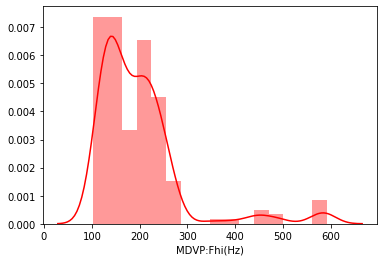

In [11]:
sns.distplot(p_df['MDVP:Fhi(Hz)'],color='r')

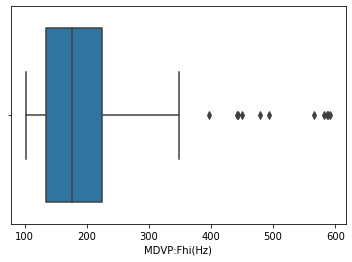

In [12]:
sns.boxplot(p_df['MDVP:Fhi(Hz)'])

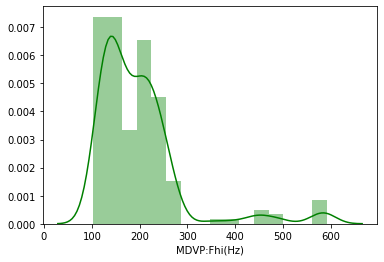

In [13]:
sns.distplot(p_df['MDVP:Fhi(Hz)'],color='g')

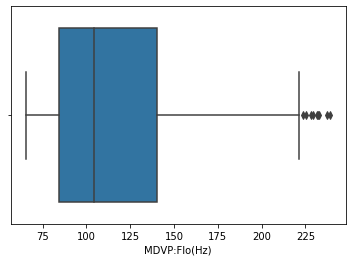

In [14]:
sns.boxplot(p_df['MDVP:Flo(Hz)'])

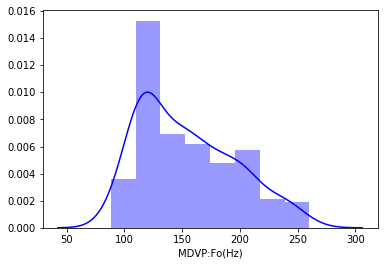

In [15]:
sns.distplot(p_df['MDVP:Fo(Hz)'],color='b')

In [16]:
p_df.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64

In [17]:
p_df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

In [18]:
p_df.isna().apply(pd.value_counts)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
False   195          195           195           195             195   

       MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
False               195       195       195         195           195  ...   

       Shimmer:DDA  NHR  HNR  status  RPDE  DFA  spread1  spread2   D2  PPE  
False          195  195  195     195   195  195      195      195  195  195  

[1 rows x 24 columns]

there is no null value in any columns of the data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C289363A20>,
      dtype=object)

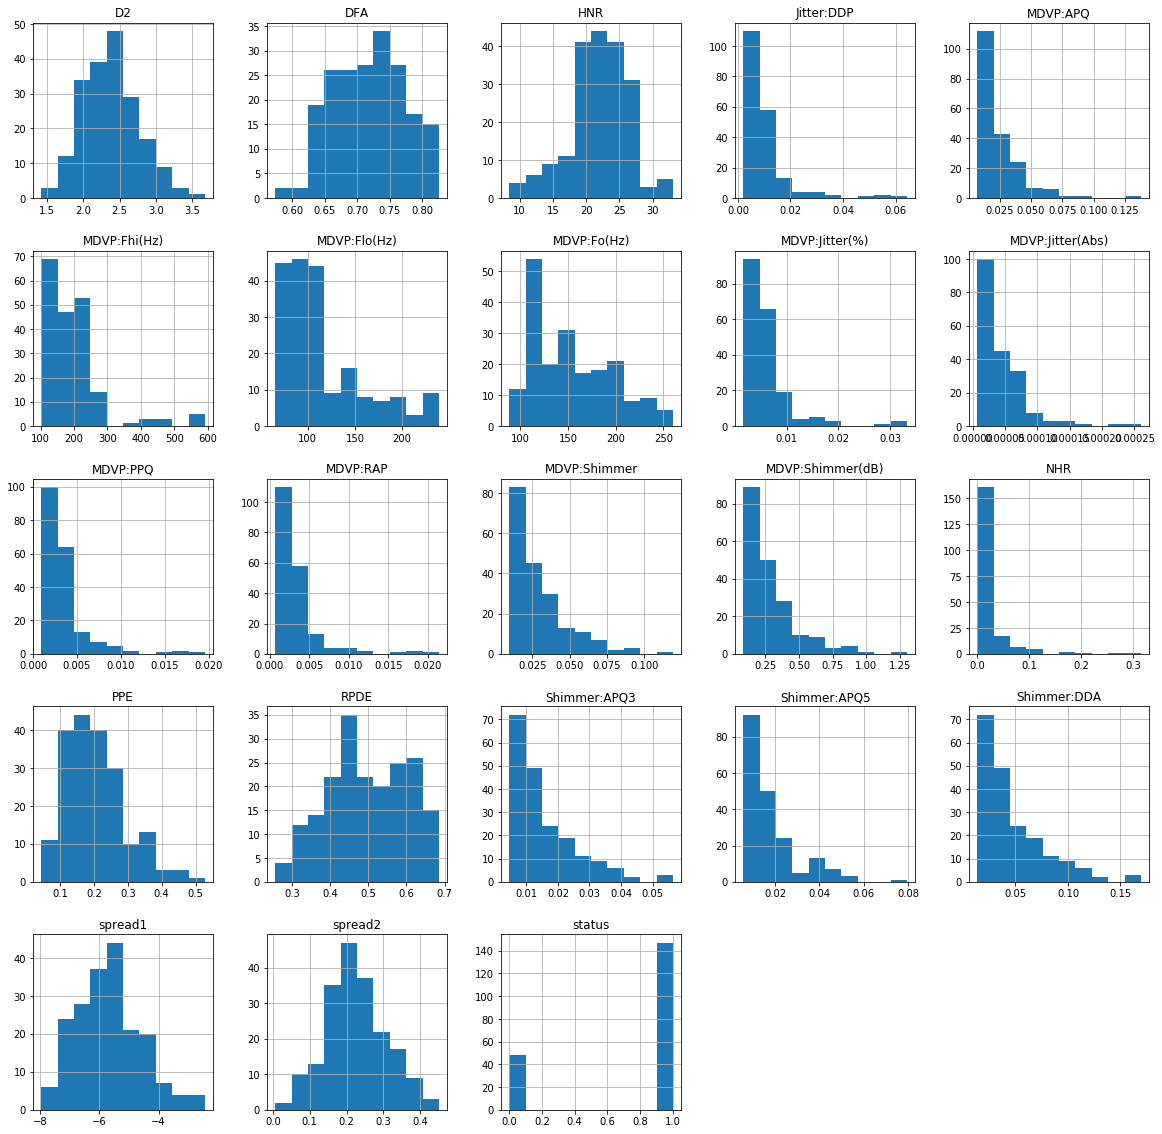

In [19]:
p_df.hist(figsize=(20,20))

from the above we can eyeball on the distribution of the data  

In [20]:
p_df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

from the above correlation result we observe that MDVP:Fhi(Hz) and NHR are very poor correlation toward target column therefore we can drop both the columns

In [21]:
p_df.drop('name',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


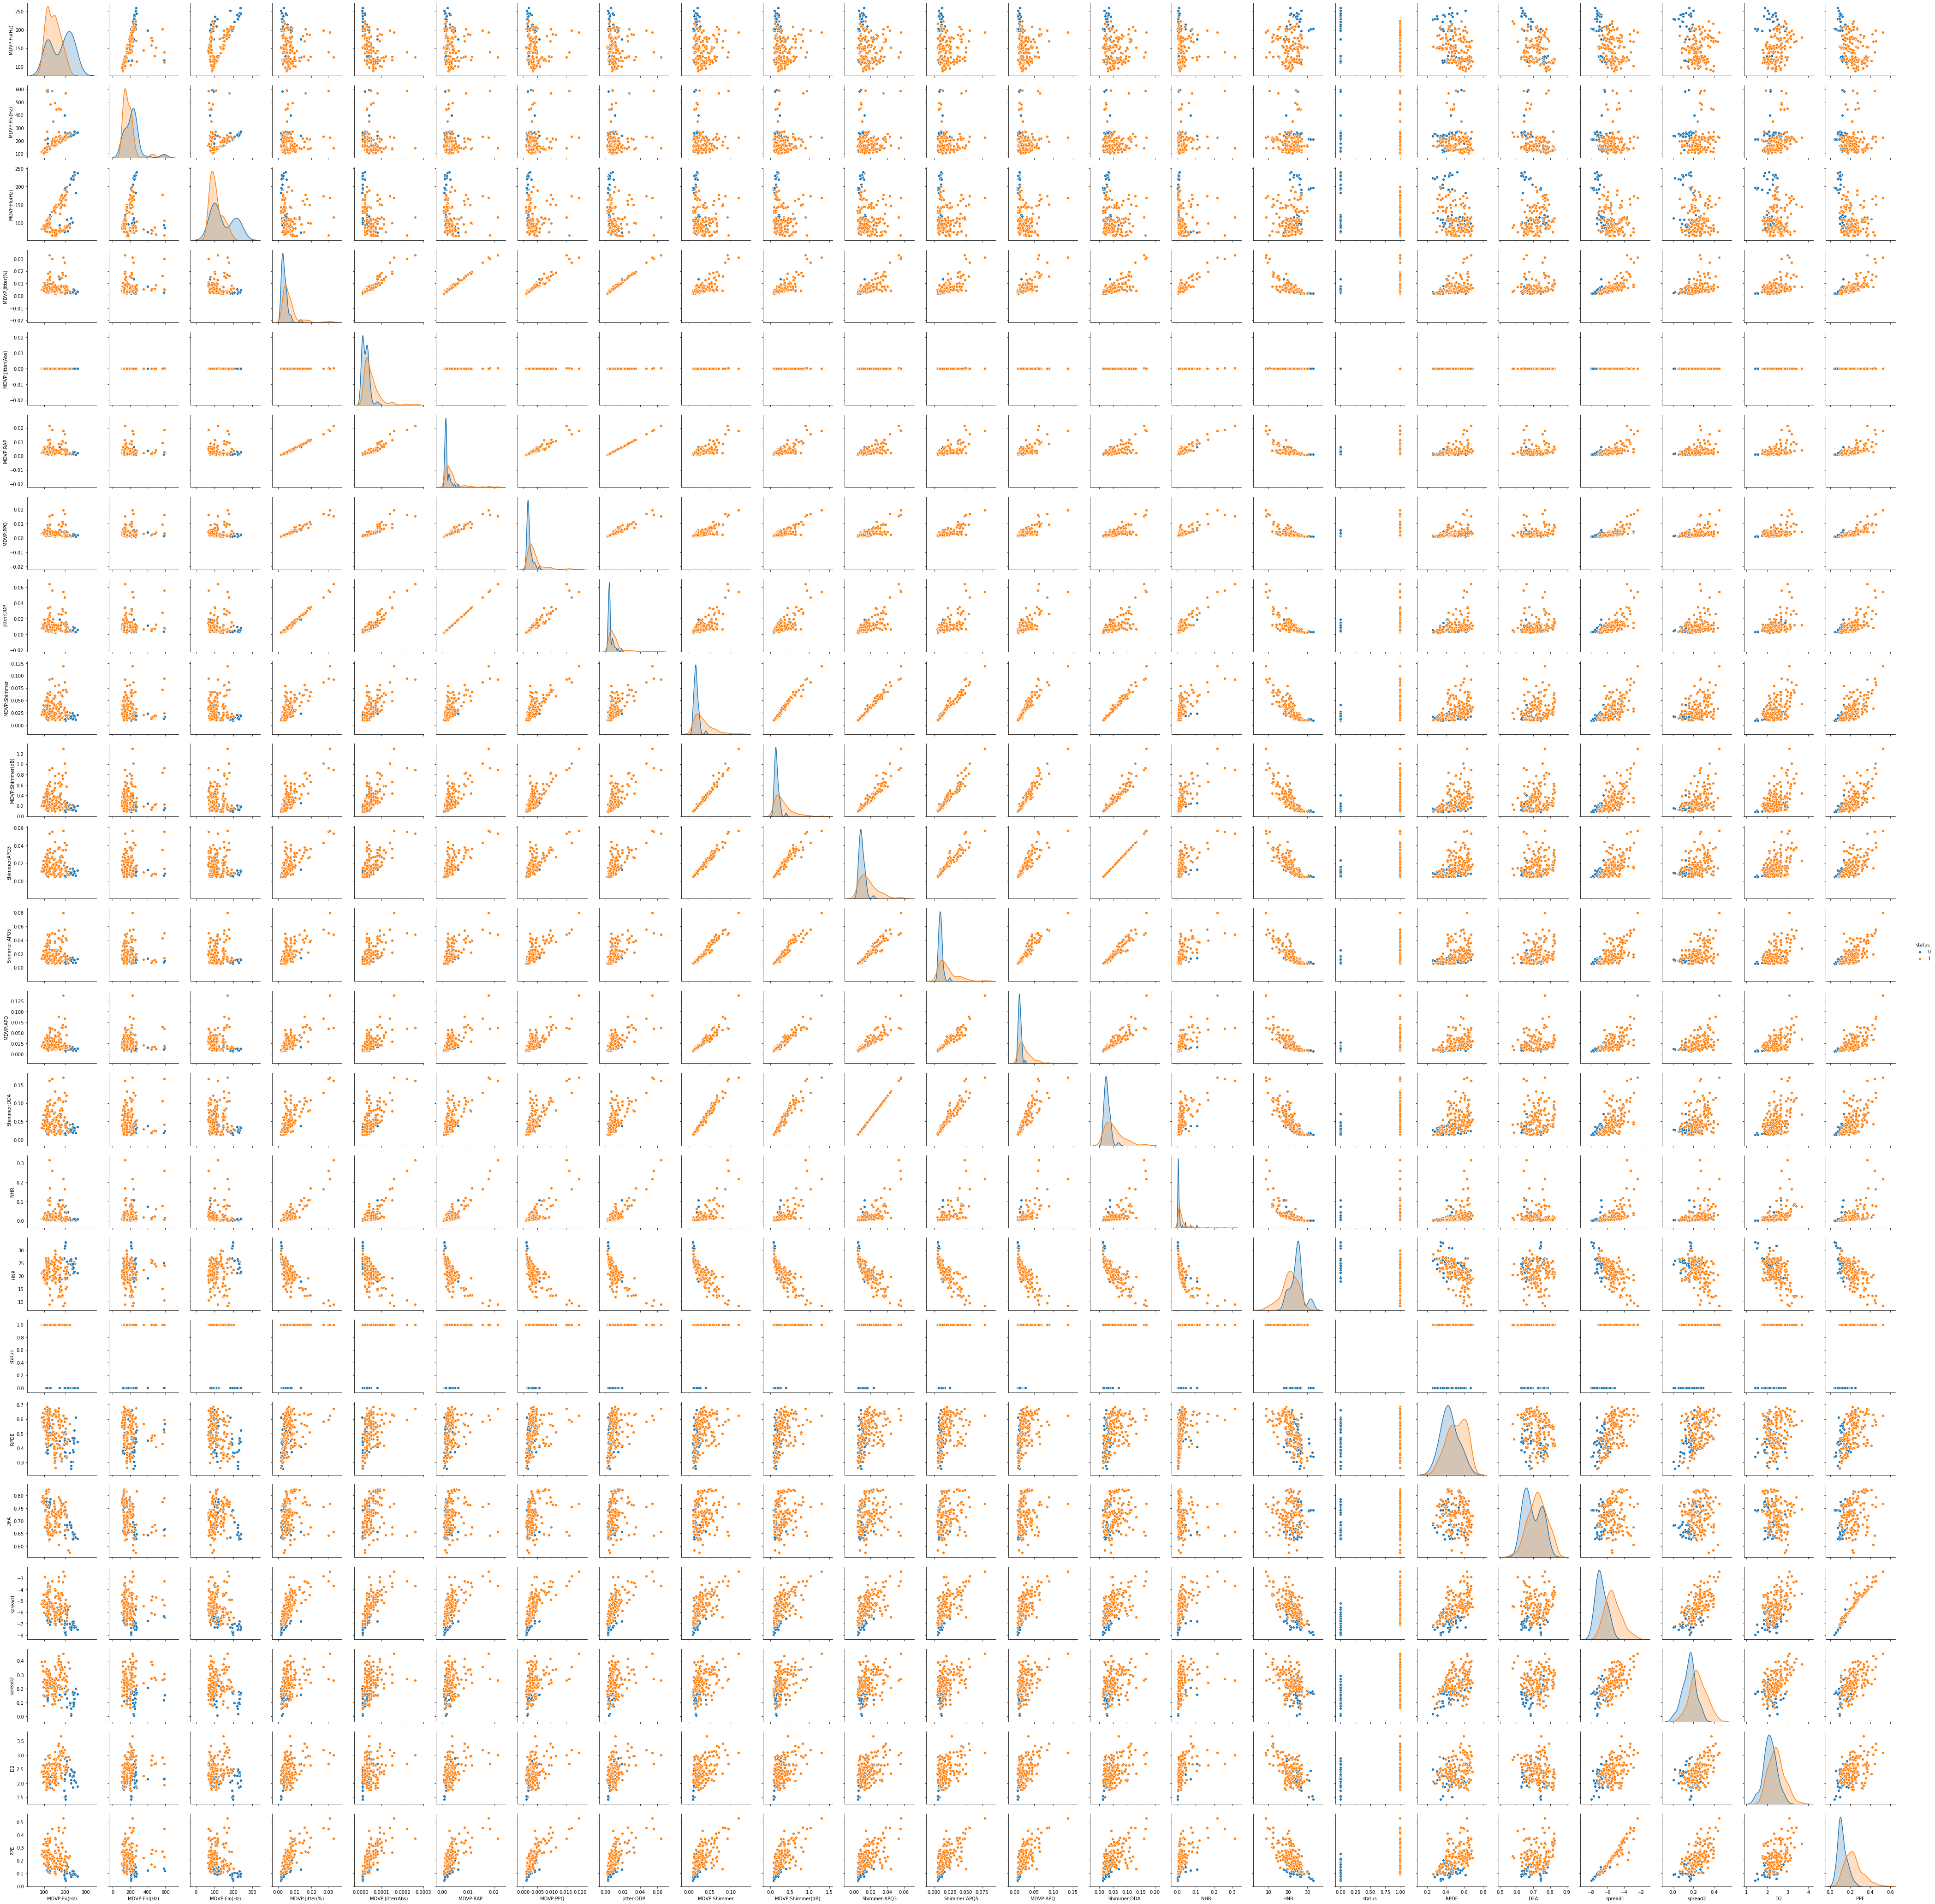

In [22]:
sns.pairplot(data=p_df,diag_kind='kde',hue='status')

from the pairplot we observed that most of the columns are weak predictor for target column and the data are overlapping 

In [23]:
df=p_df

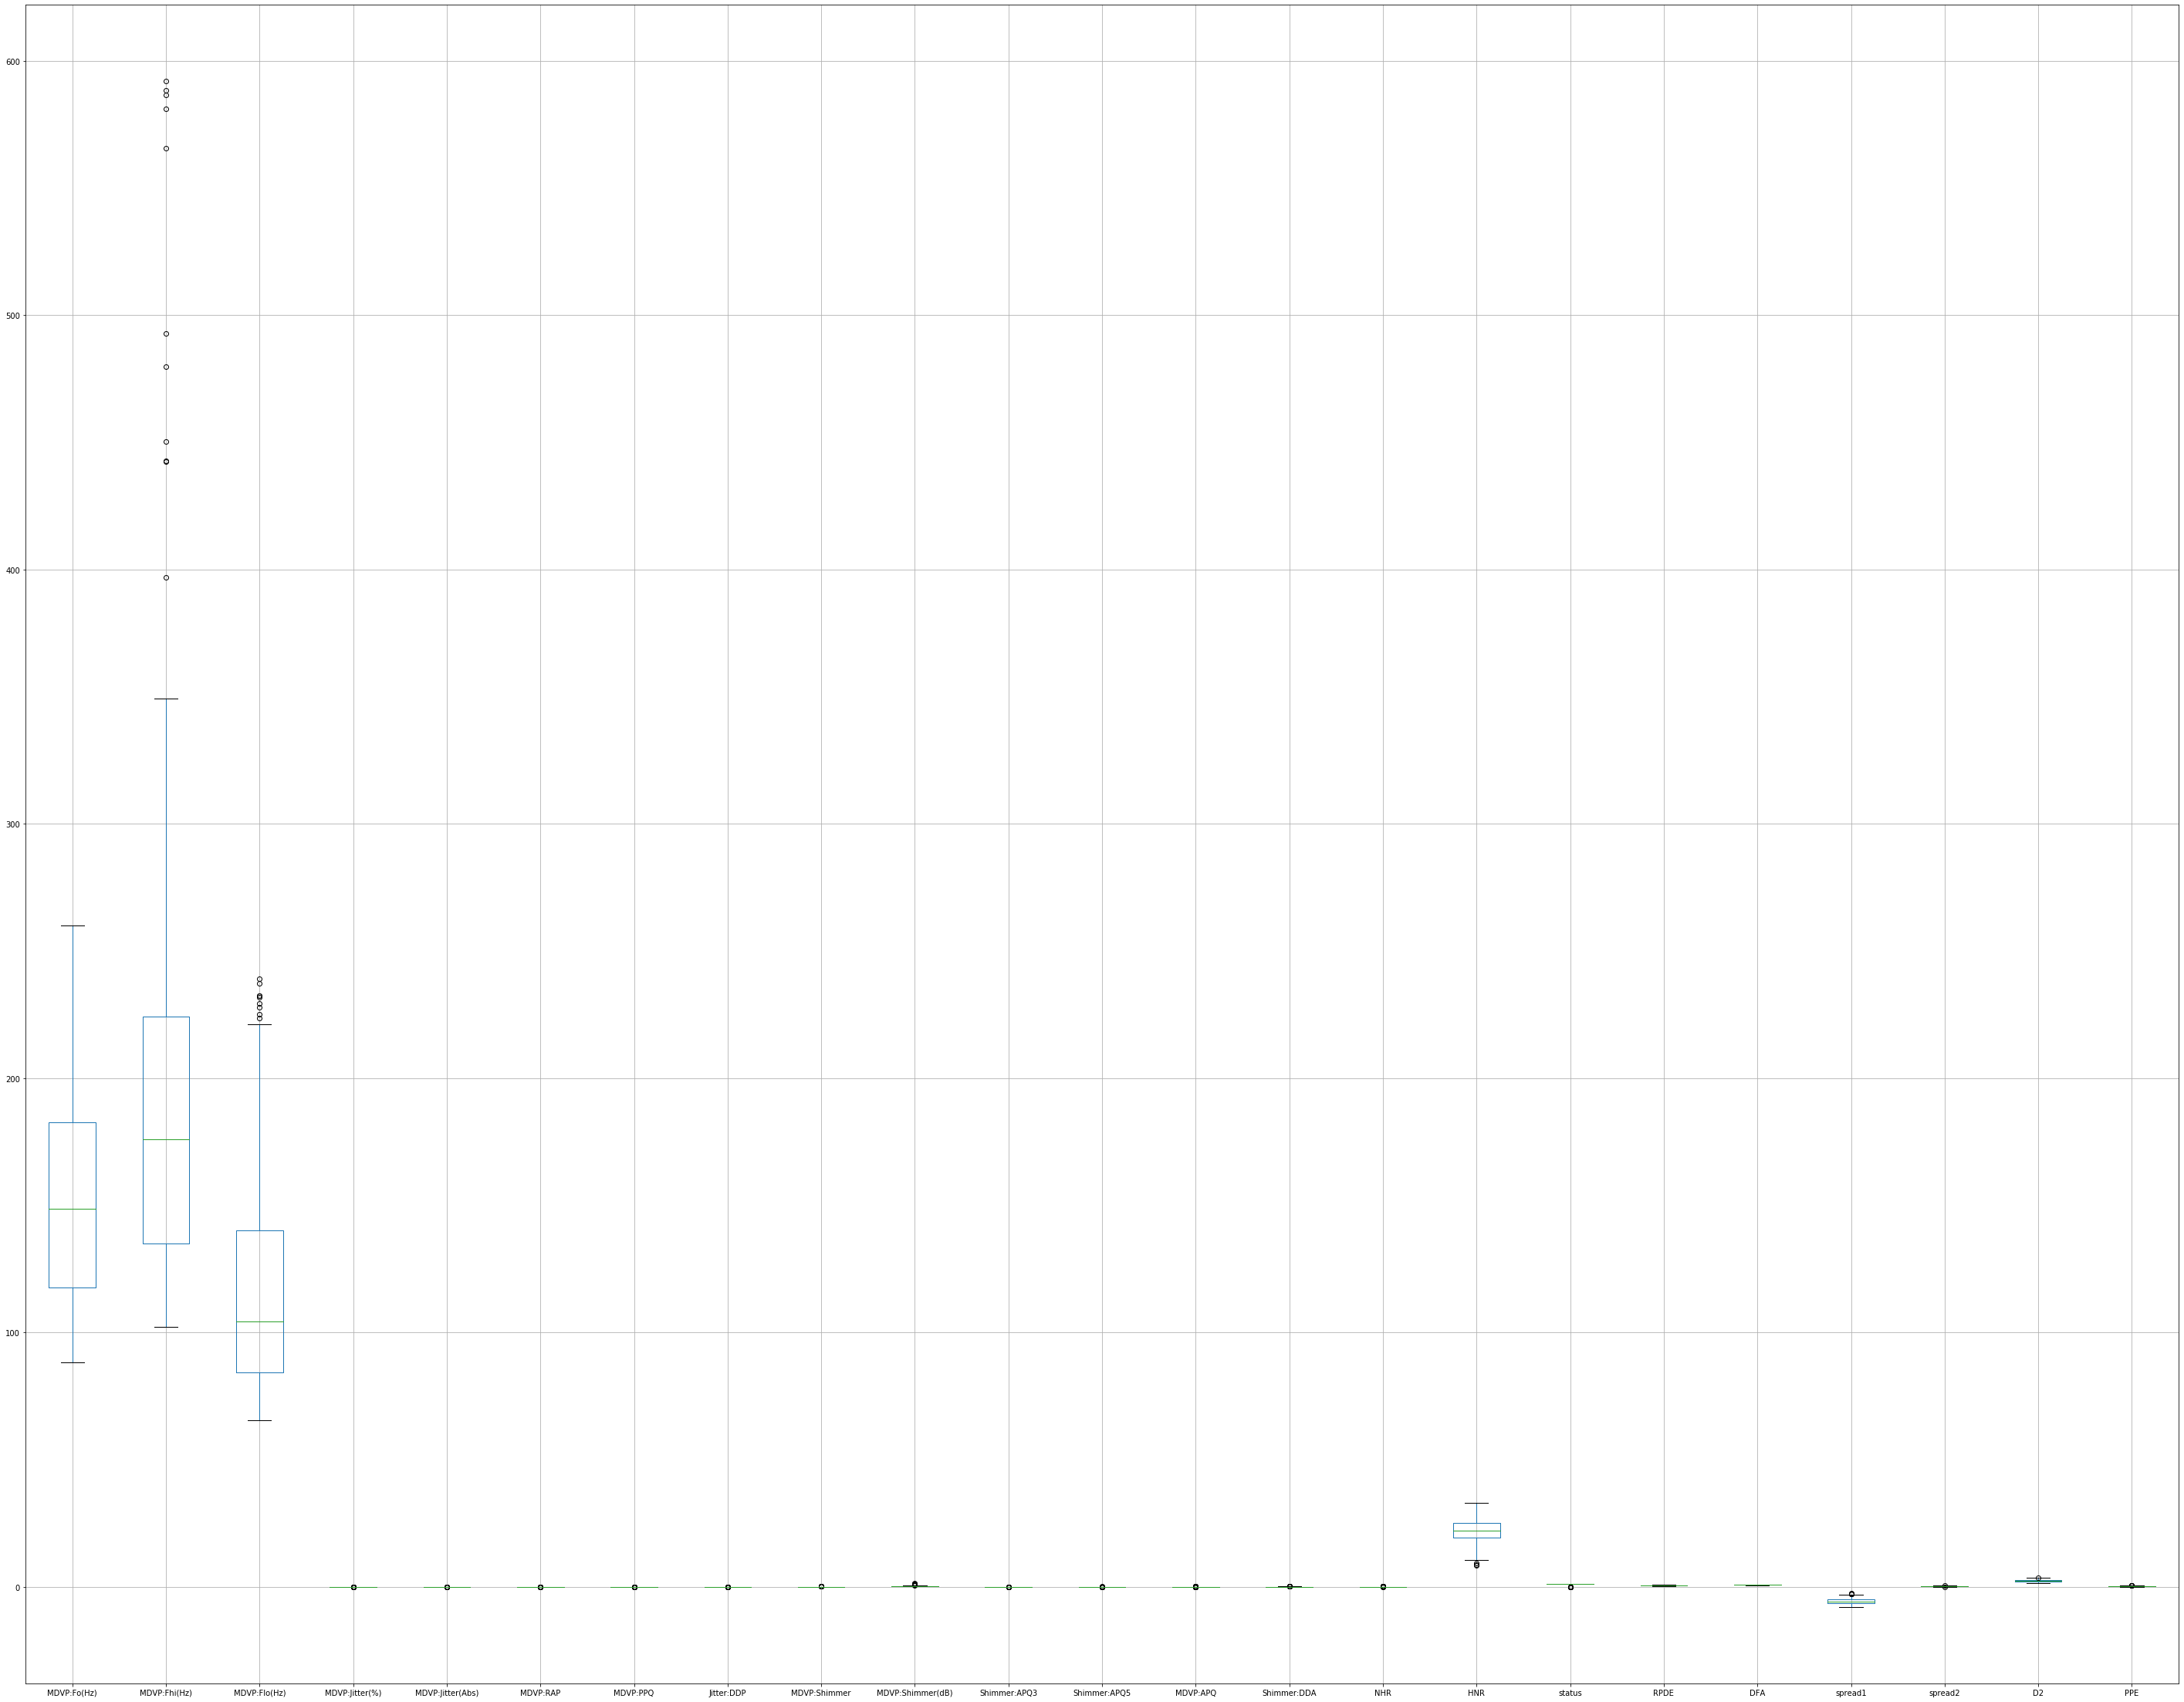

In [24]:
df.boxplot(figsize=(50,40))

form the boxplot we can observe that few outlier present in the some columns.

In [25]:
p_df['status'].value_counts().sort_index()

0     48
1    147
Name: status, dtype: int64

from the above result we can say that model predict more accuretly for case 1 (i.e is patient suffering from parkinson disease)

# Splitting the data set into training and test set in the ratio of 70:30 (Training:Test).

In [26]:
train_char_label = ['No', 'Yes']

In [27]:
# capture the target column ("status") into separate vectors for training set and test set
X = p_df.drop("status" , axis=1)

y = p_df.pop("status")


In [28]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Creating the model using “entropy” method of reducing the entropy and fitting it to training data.


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [31]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Testing the model on test data

In [44]:
y_predict = dt_model.predict(test_set)

In [45]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.8983050847457628


As we can see, we are getting an accuracy of 89.83%.

In [46]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[14  5]
 [ 1 39]]


# Capturing the predicted values and doing a cross-tab

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(dt_model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.92857143 0.78571429 1.         0.85714286 1.         0.85714286
 0.85714286 0.76923077 1.         0.91666667]


# Regularizing the Decision Tree¶

In [48]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_predict = reg_dt_model.predict(test_set)

In [50]:
reg_dt_model.score(train_set , train_labels)

0.9705882352941176

In [51]:
reg_dt_model.score(test_set , test_labels)

0.9152542372881356

Observation:

As we can see, after doing the reglarization, the model accuracy has increased. Before regularization, the accuracy was 89.83% in test set. After regularization, it rose upto 91.52%. As we tune the regularization parameters max_depth, min_sample_leaf, we can see an increase in the model accuracy. Hence, by doing the Regularization, we can improve the performance of the model.

# Implementing the decision tree using Random Forest¶

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [41]:
y_predict = rfcl.predict(test_set)

print(rfcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.864406779661017
[[11  8]
 [ 0 40]]


Observation:

As we can see from the above result, at n_estimators = 50, we get the best score of around 86.44%. Note: The accuracy keeps on changing on every run.

In [42]:
print(rfcl.score(train_set , train_labels))

1.0


In [43]:
rfcl.feature_importances_

array([0.11860326, 0.05161017, 0.05978885, 0.03393344, 0.02794812,
       0.02966155, 0.01967465, 0.05422033, 0.03048857, 0.03164834,
       0.03050657, 0.03309469, 0.03089999, 0.03671097, 0.01548901,
       0.01805537, 0.02432084, 0.02152382, 0.09986162, 0.03721827,
       0.06647254, 0.12826905])